# Stats with Telco Customer Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = '~/codeup/curriculum/data/'
df = pd.read_csv(path + "Cust_Churn_Telco.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
df.shape

(7043, 21)

In [124]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

These should be numeric data types: 
tenure, MonthlyCharges, TotalCharges

In [125]:
df.loc[df['tenure'] == 0, ['TotalCharges']] = df.MonthlyCharges
df.TotalCharges = pd.to_numeric(df['TotalCharges'])

In [126]:
df.SeniorCitizen = df['SeniorCitizen'].astype('category')

In [127]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [128]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Count
### Distinct values in a variable

In [129]:
# of distinct values in column
for name in df.columns:
    ct = df[name].nunique()
    print(name + ': ' + str(ct))

customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6534
Churn: 2


### Number of observations with each unique value

In [130]:
# Count number of rows with each unique value of discrete variable, or variable with < 10 distinct values
for name in df.columns:
    df_unique = pd.DataFrame(df[name].value_counts())
    if len(df_unique) < 10:
        print(df_unique)

        gender
Male      3555
Female    3488
   SeniorCitizen
0           5901
1           1142
     Partner
No      3641
Yes     3402
     Dependents
No         4933
Yes        2110
     PhoneService
Yes          6361
No            682
                  MultipleLines
No                         3390
Yes                        2971
No phone service            682
             InternetService
Fiber optic             3096
DSL                     2421
No                      1526
                     OnlineSecurity
No                             3498
Yes                            2019
No internet service            1526
                     OnlineBackup
No                           3088
Yes                          2429
No internet service          1526
                     DeviceProtection
No                               3095
Yes                              2422
No internet service              1526
                     TechSupport
No                          3473
Yes                  

## Numeric Summaries

In [131]:
df.describe()
# numericVars = ['tenure', 'MonthlyCharges', 'TotalCharges']
# df[numericVars].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [132]:
IQR = df.describe().loc['75%'] - df.describe().loc['25%']
# Q1 = df['tenure'].quantile(0.25)
# Q3 = df['tenure'].quantile(0.75)
# IQR = Q3 - Q1
IQR

tenure              46.00
MonthlyCharges      54.35
TotalCharges      3388.05
dtype: float64

# Covariance

In [133]:
# x = pd.DataFrame([[0, 2], [1, 1], [2, 0]])
X = np.array(df[numericVars]).T
np.cov(X)

array([[6.03168108e+02, 1.83196987e+02, 4.59923276e+04],
       [1.83196987e+02, 9.05410934e+02, 4.44145299e+04],
       [4.59923276e+04, 4.44145299e+04, 5.13806566e+06]])

## Correlation

In [134]:
np.corrcoef(X, rowvar=True)

array([[1.        , 0.24789986, 0.82616421],
       [0.24789986, 1.        , 0.65118199],
       [0.82616421, 0.65118199, 1.        ]])

## Distribution

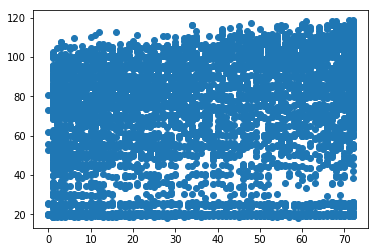

In [136]:
plt.scatter(df.tenure, df.MonthlyCharges)

In [144]:
fig = plt.figure()
fig.add_axes()
ax = fig.add_subplot()

<Figure size 432x288 with 0 Axes>